In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
file = "cdc_dataset.csv"
file_df = pd.read_csv(file)
file_df.head()

,disease,state,epi_week,incidence_per_100000
0,DIPHTHERIA,MA,192152,31.11
1,DIPHTHERIA,MA,192251,39.81
2,DIPHTHERIA,MA,191635,14.98
3,DIPHTHERIA,MA,191713,53.34
4,DIPHTHERIA,MA,192135,35.84


In [3]:
ca_df = file_df.loc[file_df["state"] == "CA", :]
ca_df = ca_df.reset_index()
ca_df = ca_df.drop(columns=["index"])
ca_df["disease"].unique()

array(['DIPHTHERIA', 'MEASLES', 'MUMPS', 'PERTUSSIS', 'POLIO', 'RUBELLA',
       'HEPATITIS A', 'SMALLPOX'], dtype=object)

In [4]:
ca_meas_df = ca_df.loc[ca_df["disease"] == "HEPATITIS A"]
ca_meas_df = ca_meas_df.sort_values("epi_week")
ca_meas_df = ca_meas_df.reset_index()
ca_meas_df.head()

,index,disease,state,epi_week,incidence_per_100000
0,6856,HEPATITIS A,CA,196601,0.47
1,1735,HEPATITIS A,CA,196602,0.65
2,13930,HEPATITIS A,CA,196603,0.52
3,13759,HEPATITIS A,CA,196604,0.70
4,13762,HEPATITIS A,CA,196605,0.69


In [5]:
ca_rounded_df = ca_meas_df
ca_rounded_df["epi_week"] = ca_rounded_df["epi_week"]/100
#ca_rounded_df["epi_week"] = int(ca_rounded_df["epi_week"])
ca_rounded_df.head()

,index,disease,state,epi_week,incidence_per_100000
0,6856,HEPATITIS A,CA,1966.01,0.47
1,1735,HEPATITIS A,CA,1966.02,0.65
2,13930,HEPATITIS A,CA,1966.03,0.52
3,13759,HEPATITIS A,CA,1966.04,0.70
4,13762,HEPATITIS A,CA,1966.05,0.69


In [6]:
ca_rounded_df["epi_week"] = ca_rounded_df["epi_week"].astype(int)
ca_rounded_dropped_df = ca_rounded_df.groupby(["epi_week"]).sum()
ca_rounded_dropped_df = ca_rounded_dropped_df.reset_index()
ca_rounded_dropped_df = ca_rounded_dropped_df.drop(columns="index")
ca_rounded_dropped_df = ca_rounded_dropped_df.rename(columns={"epi_week":"year"})
ca_rounded_dropped_df.head()

,year,incidence_per_100000
0,1966,31.45
1,1967,38.98
2,1968,55.79
3,1969,45.90
4,1970,46.35


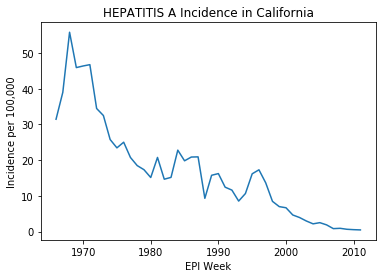

In [12]:

plt.plot(ca_rounded_dropped_df["year"], ca_rounded_dropped_df["incidence_per_100000"])

plt.title("HEPATITIS A Incidence in California")
plt.xlabel("EPI Week")
plt.ylabel("Incidence per 100,000")
plt.savefig("hep-a.png", dpi=200)
plt.show()

In [8]:
ca_meas_df["epi_week"].describe()
len(ca_meas_df)/52

38.5

In [9]:
#test to drop week from year column
year_test = 194211
year_change = year_test/100
year_change = int(year_change)
year_change

1942

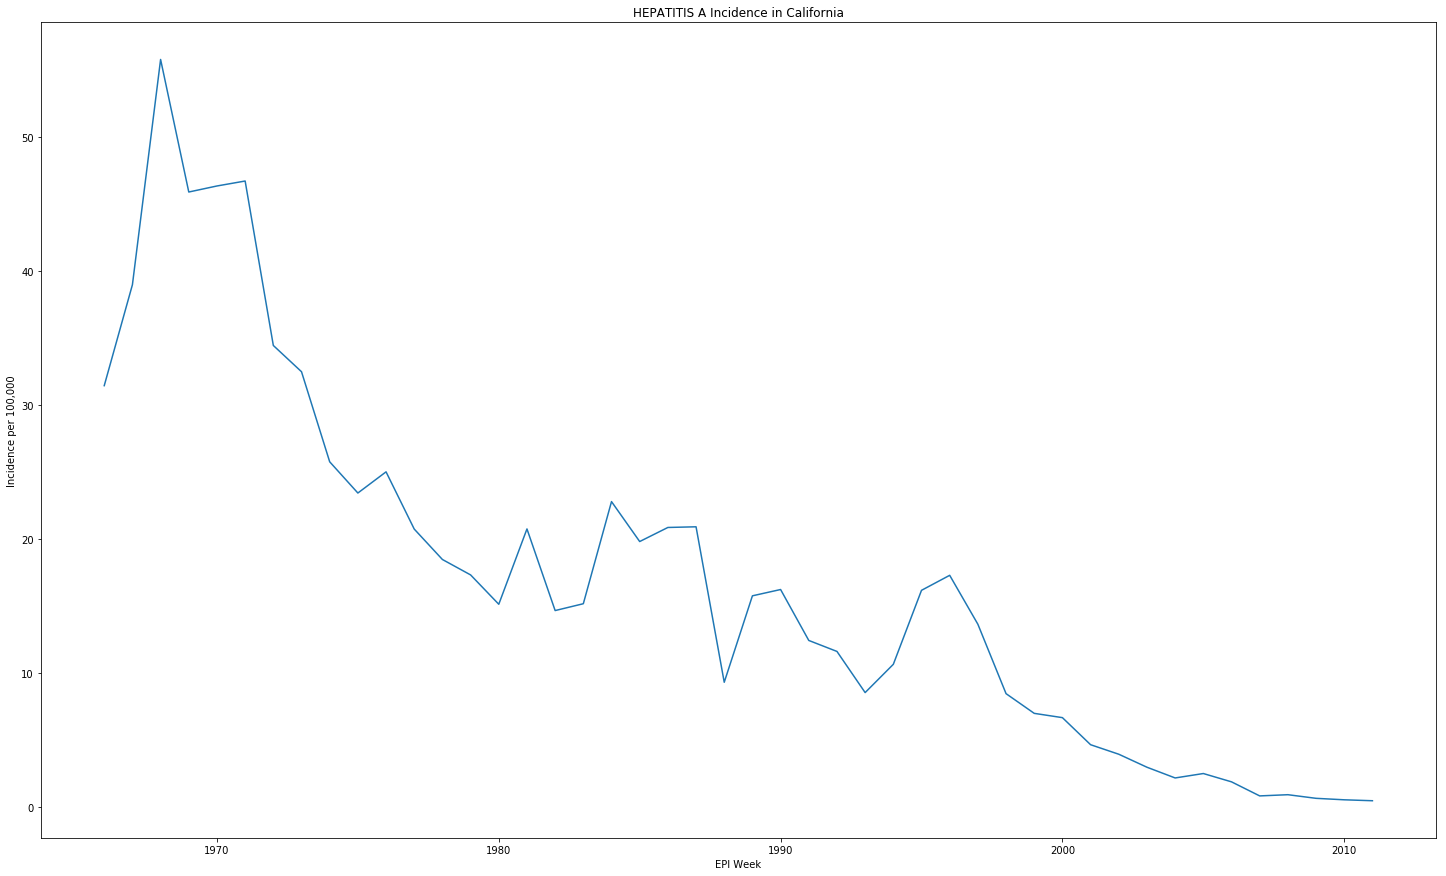

In [10]:
#measles vaccine was introduced in 1963
after_vac_df = ca_rounded_dropped_df.loc[ca_rounded_dropped_df["year"]>=1963]
plt.figure(figsize=(25,15))
plt.plot(after_vac_df["year"], after_vac_df["incidence_per_100000"])

plt.title("HEPATITIS A Incidence in California")
plt.xlabel("EPI Week")
plt.ylabel("Incidence per 100,000")
plt.show()
plt.show()